In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_excel("Задания/Datasets/Doctor.xlsx")
df.columns = ['y', 'x1', 'x2', 'x3', 'x4', 'x5']
print(df.shape)
df = df.fillna(df.mean())
df.head(20)

(58, 6)


,y,x1,x2,x3,x4,x5
0,0,14,4.30,1.00,2,3.72
1,0,12,11.54,8.49,3,40.28
2,0,14,5.84,2.47,3,56.00
3,1,11,14.70,6.60,1,57.41
4,0,21,5.10,3.48,1,83.00
5,0,12,6.14,3.09,1,62.57
6,1,17,5.05,1.14,3,22.16
7,1,12,11.30,8.85,1,12.00
8,0,14,3.30,1.20,3,110.00
9,1,19,6.60,4.30,1,2.96


In [28]:
df.describe()

,y,x1,x2,x3,x4,x5
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.637931,16.327586,10.327931,7.141379,2.344828,45.135000
std,0.484796,3.213939,3.957742,3.749343,0.928151,53.956171
min,0.000000,11.000000,3.300000,1.000000,1.000000,0.800000
25%,0.000000,14.000000,6.375000,3.985000,1.000000,22.115000
50%,1.000000,16.000000,10.450000,6.835000,3.000000,38.935000
75%,1.000000,19.000000,13.400000,9.975000,3.000000,53.125000
max,1.000000,27.000000,19.000000,16.000000,3.000000,399.800000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       58 non-null     int64  
 1   x1      58 non-null     int64  
 2   x2      58 non-null     float64
 3   x3      58 non-null     float64
 4   x4      58 non-null     int64  
 5   x5      58 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.8 KB


In [30]:
data = df.copy()
data['y'] = pd.Categorical(df['y'])
data['x4'] = pd.Categorical(df['x4'])

In [31]:
df.head(5)

,y,x1,x2,x3,x4,x5
0,0,14,4.30,1.00,2,3.72
1,0,12,11.54,8.49,3,40.28
2,0,14,5.84,2.47,3,56.00
3,1,11,14.70,6.60,1,57.41
4,0,21,5.10,3.48,1,83.00


In [32]:
X = df.drop('y', axis=1)  
y = df['y']     

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

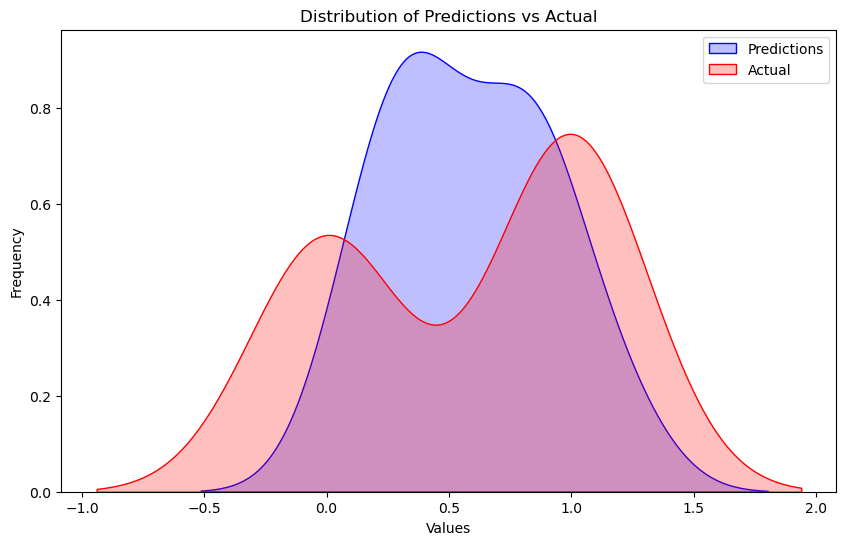

In [34]:
model = LinearRegression()

model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Plot the distribution of predicted and actual values using Kernel Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(predictions, color="blue", label="Predictions", fill=True)
sns.kdeplot(y_test, color="red", label="Actual", fill=True)

# Set labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions vs Actual")
plt.legend()

# Show the plot
plt.show()